# Importing libraries 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
# IG(Y , X) = E(Y) - E(Y|X)

# information gain(y,x)=entropy of y - entropy of y wrt x

# Data Import


In [3]:
cr=pd.read_csv("E:\python_imarticus_pranjal_sir\dataframe\loan.csv")

In [4]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    float64
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 99.8+ KB


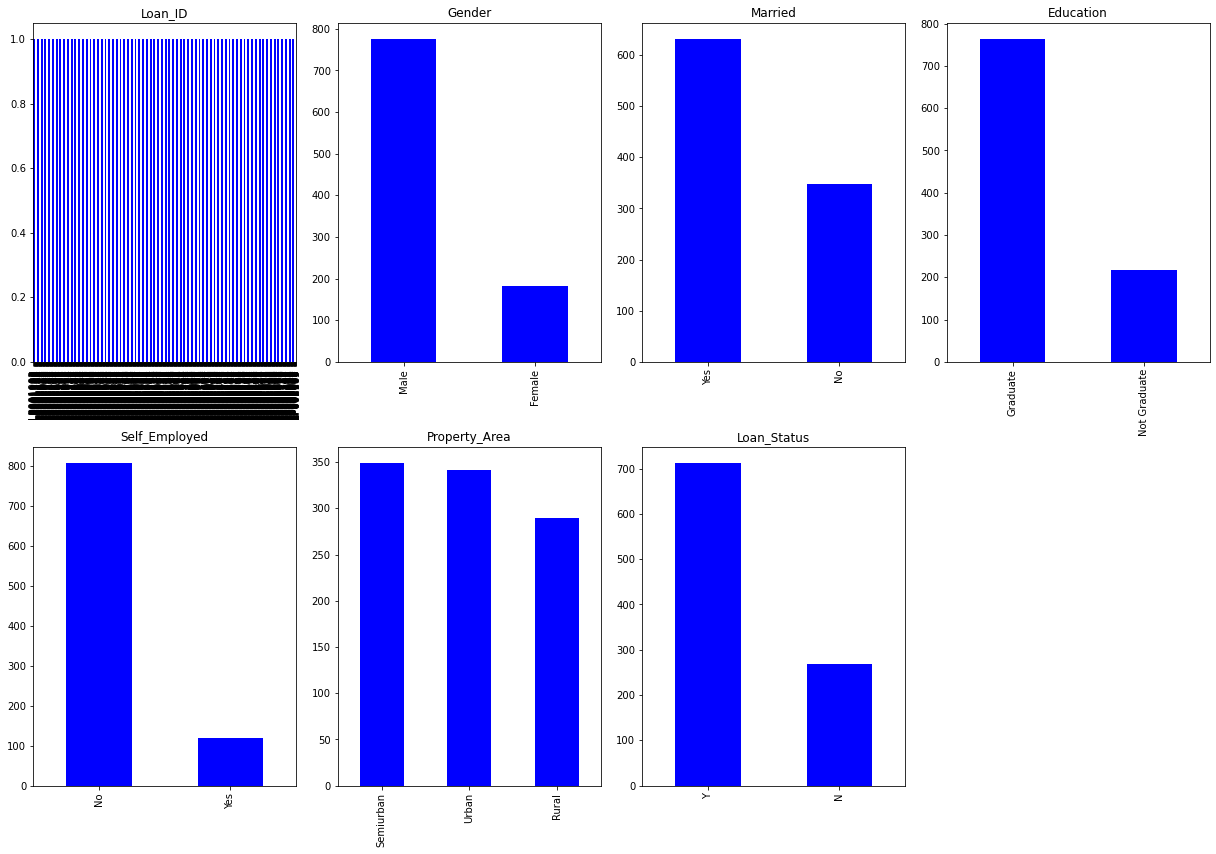

In [7]:
cat_col=cr.select_dtypes(include=object).columns.tolist()
plt.figure(figsize=(17,17))
for i ,var in enumerate(cat_col):
    plt.subplot(3,4,i+1)
    cr[var].value_counts().plot(kind='bar',color="b")
    plt.tight_layout()
    plt.title(var)

# Check null


In [8]:
cr.isnull().sum()[cr.isnull().sum() > 0]

Gender              24
Married              3
Dependents          25
Self_Employed       55
LoanAmount          27
Loan_Amount_Term    20
Credit_History      79
dtype: int64

# data cleaning 

In [131]:
cr.Gender.fillna('Male',inplace = True)
cr.Married.fillna('No',inplace = True)
cr.Dependents.fillna(0,inplace = True)
cr.Self_Employed.fillna('Yes',inplace = True)
cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean(),inplace = True)
cr.Credit_History.fillna(0,inplace = True)
cr.LoanAmount.fillna(cr.LoanAmount.mean(),inplace = True)

In [132]:
cr.isnull().sum()[cr.isnull().sum() > 0]

Series([], dtype: int64)

In [133]:
cr.Dependents.value_counts()

0.0    570
1.0    160
2.0    160
4.0     90
3.0      1
Name: Dependents, dtype: int64

In [134]:
cr.columns[cr.dtypes == 'object']

Index(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [135]:
cr.Gender.replace({'Male':1,'Female':0},inplace = True)
cr.Married.replace({'No':0,'Yes':1},inplace = True)
cr.Education.replace({'Graduate':1,'Not Graduate':0},inplace = True)
cr.Self_Employed.replace({'Yes':1,'No':0},inplace = True)
cr.Property_Area.replace({'Urban':2,'Rural':0,'Semiurban':1},inplace = True)
cr.Loan_Status.replace({'Y':1,'N':0},inplace = True)

In [136]:
cr.Property_Area.value_counts()

1    349
2    342
0    290
Name: Property_Area, dtype: int64

In [143]:
cr.head(40)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,4.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [138]:
cr.columns[cr.dtypes == 'object']

Index(['Loan_ID'], dtype='object')

# divide data into train and test

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
cr_train ,cr_test = train_test_split(cr , test_size = .2)



#i created train and test and then divided train into x,y and test into x,y

In [92]:
cr1 = cr_train[cr_train.Loan_Status == 0]

#change/add

In [93]:
cr_train1 = pd.concat([cr_train , cr1,cr1,cr1])

#change/add

In [94]:
cr_train_x = cr_train1.iloc[ : ,1:-1]
cr_train_y = cr_train1.iloc[ : ,-1]

In [95]:
cr_test_x = cr_test.iloc[ : ,1:-1]
cr_test_y = cr_test.iloc[ : ,-1]

In [96]:
print(cr_train_x.shape,cr_train_y.shape)

(1426, 11) (1426,)


In [97]:
print(cr_test_x.shape,cr_test_y.shape)

(197, 11) (197,)


import DecisionTreeClassifier

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
dt= DecisionTreeClassifier()

Create model

In [100]:
dt.fit(cr_train_x,cr_train_y)

DecisionTreeClassifier()

In [ ]:
pred= dt.predict(cr_test_x)

prediction on test

In [102]:
from sklearn.metrics import confusion_matrix

import confusion matrix and create 

In [103]:
confusion_matrix(cr_test_y , pred)

array([[ 27,  28],
       [ 31, 111]], dtype=int64)

In [104]:
from sklearn.metrics import accuracy_score , precision_score , recall_score,f1_score

Accuracy , precision score, recall , f1 score  

In [105]:
accuracy_score(cr_test_y , pred)*100

70.05076142131979

In [106]:
precision_score(cr_test_y , pred)*100

79.85611510791367

In [107]:
recall_score(cr_test_y , pred)*100

78.16901408450704

In [108]:
f1_score(cr_test_y , pred)*100

79.0035587188612

save model

In [109]:
import pickle

In [141]:
with open('decision_tree0' , 'wb') as xyz :
    pickle.dump(dt , xyz)

read model

In [139]:
with open('decision_tree2.pkl' , 'rb') as f :
    new_model = pickle.load(f)

In [140]:
new_model.predict(cr_train_x)

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)